# Predicción del precio de una casa

In [10]:
import numpy as np # Cálculos numéricos
import matplotlib.pyplot as plt # Visualización de los datos
import pandas as pd # Manejo de bases de datos
import seaborn as sns # Para hacer gráficas más avanzadas
from tensorflow.keras.models import Sequential # Modelos básicos de redes neuronales
from tensorflow.keras.layers import Dense # Modelos básicos de redes neuronales
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split # Para generar los conjuntos de entrenamiento y prueba
from sklearn.datasets import load_boston # Importar la base de datos desde la nube
from sklearn.preprocessing import MinMaxScaler # El tipo de estandarización que usaremos

In [2]:
plt.rcParams['figure.figsize'] = (9,9) # Para que las gráficas se vean más grandes

Importar la base de datos desde la nube

In [8]:
dataset = load_boston() # Cargar la base de datos desde la nube
house_prices = pd.DataFrame(dataset.data, columns=dataset.feature_names) # Las columnas de entrada
house_prices['MEDV'] = dataset.target # La columna de salida
house_prices.head(-1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9


## Conociendo la base

Como dijimos,la base consiste en 13 columnas de entrada que representan una característica, y la última representa el precio de la casa en miles de dolares.

Los datos que tenemos en las columnas son:
1. CRIM: Índice de criminología per capita de la región
2. ZN: Proporción de las áreas residenciales construidas vs no construidas
3. INDUS: Proporción de las zonas industriales en la región
4. CHAS: Variable Charles-River
5. NOX: Concentración del óxido nítrico en partes por millón (ppm)
6. RM: Media de habitaciones por vivienda
7. AGE: Proporción de unidades ocupadas por sus propietarios
8. DIS: Distancia ponderada a cinco centros de empleo en Boston
9. RAD: Índice de accesibilidad a autopistas radiales
10. TAX: Taza de impuestos de la vivienda
11. PTRATIO: Relacion docente-alumno por ciudad
12. B: Proporción de personas afroamericanas por ciudad
13. LSTAT: Porcentaje de la población de bajos recursos
14. MEDV: Valor medio de las casas, en miles de dolares

## Creando la red neuronal

In [9]:
# Conversión de datos

datos = house_prices.values

X = datos[:,0:13].astype(float)
Y = datos[:,13]

# Crear los conjuntos de datos
Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2)

Vamos a estandarizar los datos usando comando *MinMaxScaler()* de la libería **Sklearn**.

Esta forma de estandarización igualará a $0$ el valor mínimo de cada variable, mientras que el valor máximo será igual a $1$.

In [11]:
# Estandarizando los datos
scaler = MinMaxScaler() 
Xtrain_scaled = scaler.fit_transform(Xtrain) # Usamos un variable de apoyo para no perder los valores originales
Xtest_scaled = scaler.fit_transform(Xtest) # Repetimos el paso anterior

In [13]:
# Definir la arquitectura de red

model = Sequential()
model.add(Dense(100, input_dim=13, activation='relu')) # Capa de entrada
model.add(Dense(200,activation='relu')) # Capa oculta
model.add(Dense(50, activation='relu')) # Capa oculta
model.add(Dense(25, activation='relu')) # Capa oculta
model.add(Dense(1)) # Capa de salida

In [20]:
# Compilar el modelo

model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['MeanSquaredError'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 32,951
Trainable params: 32,951
Non-trainable params: 0
_________________________________________________________________


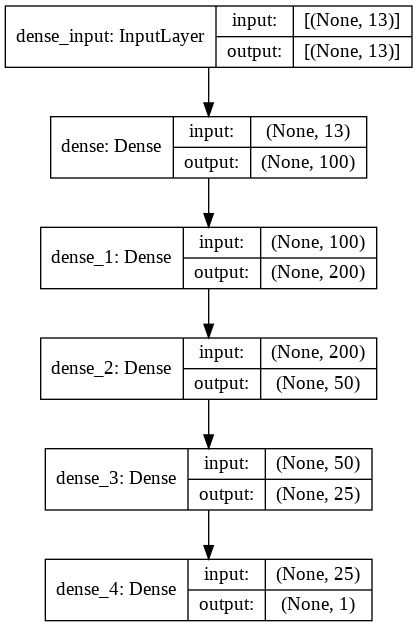

In [21]:
# Visualizar la arquitectura
plot_model(model,show_shapes=True)

In [22]:
# Entrenamiento del modelo

model.fit(Xtrain_scaled, ytrain,
          validation_data=(Xtest_scaled,ytest),
          batch_size=100,
          epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 52ms/step - loss: 588.1266 - mean_squared_error: 588.1266 - val_loss: 581.3529 - val_mean_squared_error: 581.3529
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 573.9014 - mean_squared_error: 573.9014 - val_loss: 563.0413 - val_mean_squared_error: 563.0413
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 551.8854 - mean_squared_error: 551.8854 - val_loss: 531.7446 - val_mean_squared_error: 531.7446
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 513.4056 - mean_squared_error: 513.4056 - val_loss: 479.6807 - val_mean_squared_error: 479.6807
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 452.0480 - mean_squared_error: 452.0480 - val_loss: 399.8584 - val_mean_squared_error: 399.8584
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 364.0162 - mean_squared_error: 364.0162 - val_loss: 291.5504 - val_mean_squared_error: 291

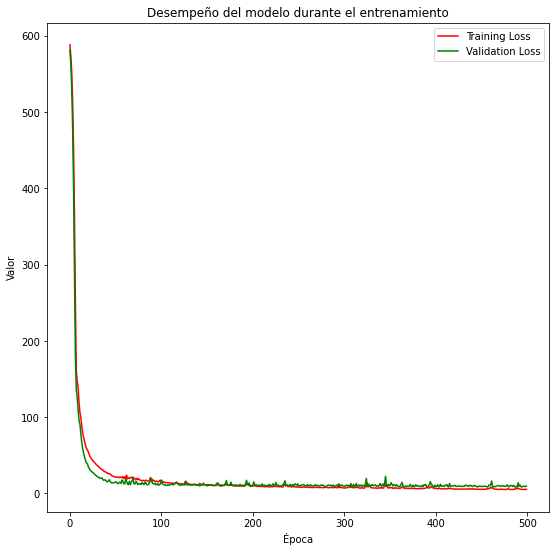

In [25]:
# Gráficar el desempeño del entrenamiento

train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']


plt.figure()
plt.plot(train_loss,'r')
plt.plot(val_loss,'g')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Desempeño del modelo durante el entrenamiento')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

Las métricas usadas para este caso no serán iguales a los casos de clasificación. De cierta forma, clasificar cosas es más sencillo que predecir algo, pues tenemos un 50%, como mínimo, de probabilidad de atinar al resultado. Sin embargo, cuando tratamos de "adivinar" un valor con regresión lineal, la exactitud no resulta tan óptima como en la clasificación.

Dos de las métricas más usadas en regresión lineal son el valor de perdida y el error. La pérdida es qué tanto se penaliza a la red (modelo) por cometer un error. El error es la distancia de un punto respecto a la función obtenida, es decir, qué tan lejos se colocó el punto de la, en este caso, recta.

In [31]:
y_pred = model.predict(Xtest_scaled)

from sklearn import metrics

print('Mean absolute error: %.4f'% metrics.mean_absolute_error(ytest,y_pred))
print('Mean squared error: %.4f' % metrics.mean_squared_error(ytest, y_pred))
print('Varianza: %.4f' % metrics.explained_variance_score(ytest, y_pred))

Mean absolute error: 2.4419
Mean squared error: 9.7005
Varianza: 0.8723


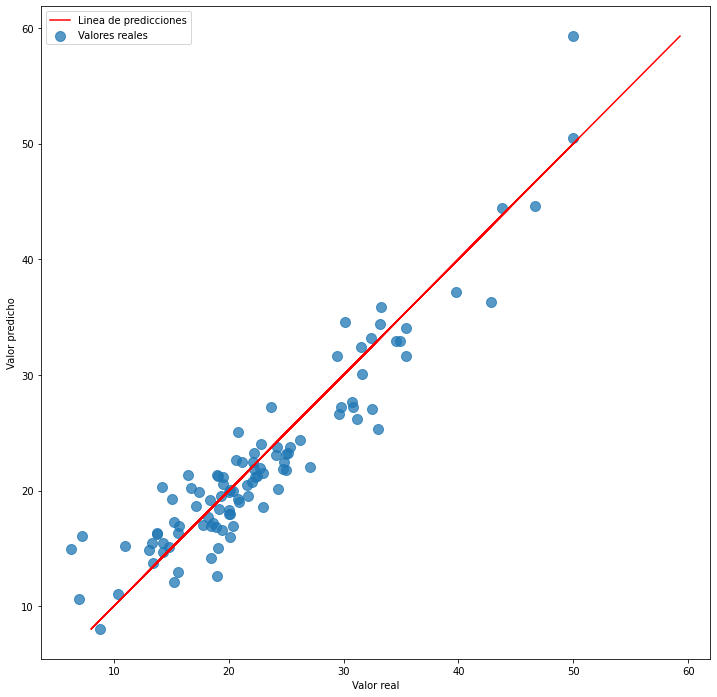

In [46]:
# Visualizar todo en una gráfica

plt.figure(figsize=(12,12))
plt.scatter(ytest,y_pred,s=100,alpha=0.75)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.legend(['Linea de predicciones','Valores reales'])
plt.show()